### Importa√ß√£o de Bibliotecas

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Importando Dataset

In [4]:
df = pd.read_csv("../data/cryptocurrency.csv")

### Verifica√ß√£o de dados e filtragem

In [16]:
# Conferir valores nulos
df.isnull().sum()

# Checar duplicatas
df.duplicated().sum()

np.int64(0)

### Convers√£o de coluna ['Date']

In [17]:
# Precisa converter Date (object) --> Date (datetime)
df['Date'] = pd.to_datetime(df['Date'])

# Criar colunas Ano, M√™s e Dia
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

### BTC / ETH Datas Inicias

In [18]:
# Ver de quando at√© quando vai cada moeda.
df.groupby("Symbol")["Date"].agg(["min", "max"])

min                 max
Symbol                                        
BTC    2013-04-29 23:59:59 2021-07-06 23:59:59
ETH    2015-08-08 23:59:59 2021-07-06 23:59:59

### Encontrando data simult√¢nea inicial para BTC e ETH

In [19]:
# Encontrar intervalo comum entre moedas
start_date = df.groupby("Symbol")["Date"].min().max()  # maior data inicial
end_date = df.groupby("Symbol")["Date"].max().min()    # menor data final

# Filtrar dataset
df_2015 = df[(df["Date"] >= start_date) & (df["Date"] <= end_date)]

# DF-2015 com erro no index
df_2015 = df_2015.reset_index(drop=True)  # reseta o √≠ndice antigo
df_2015["SNo"] = df_2015.index + 1

### An√°lises Iniciais encontradas no dataset:

##### √â poss√≠vel logo inicialmente criar a coluna ['Return'] onde se d√° pelo calculo da varia√ß√£o percentual do pre√ßo de fechamento de um dia para o outro, ou seja, cada linha de df['Return'] mostra quanto (%) o pre√ßo de fechamento mudou em rela√ß√£o ao dia anterior.

In [20]:
# Retorno Di√°rio
df['Return'] = df['Close'].pct_change() * 100

In [21]:
df

SNo      Name Symbol                Date         High          Low  \
0        1   Bitcoin    BTC 2013-04-29 23:59:59   147.488007   134.000000   
1        2   Bitcoin    BTC 2013-04-30 23:59:59   146.929993   134.050003   
2        3   Bitcoin    BTC 2013-05-01 23:59:59   139.889999   107.720001   
3        4   Bitcoin    BTC 2013-05-02 23:59:59   125.599998    92.281898   
4        5   Bitcoin    BTC 2013-05-03 23:59:59   108.127998    79.099998   
...    ...       ...    ...                 ...          ...          ...   
5146  2156  Ethereum    ETH 2021-07-02 23:59:59  2155.596496  2021.824808   
5147  2157  Ethereum    ETH 2021-07-03 23:59:59  2237.567155  2117.590013   
5148  2158  Ethereum    ETH 2021-07-04 23:59:59  2384.286857  2190.837703   
5149  2159  Ethereum    ETH 2021-07-05 23:59:59  2321.922836  2163.041394   
5150  2160  Ethereum    ETH 2021-07-06 23:59:59  2346.294874  2197.919385   

             Open        Close        Volume     Marketcap  Year  Month  Day  \
0      134.444000   144.539993  0.000000e+00  1.603769e+09  2013      4   29   
1      144.000000   139.000000  0.000000e+00  1.542813e+09  2013      4   30   
2      139.000000   116.989998  0.000000e+00  1.298955e+09  2013      5    1   
3      116.379997   105.209999  0.000000e+00  1.168517e+09  2013      5    2   
4      106.250000    97.750000  0.000000e+00  1.085995e+09  2013      5    3   
...           ...          ...           ...           ...   ...    ...  ...   
5146  2109.892677  2150.040364  3.179621e+10  2.505527e+11  2021      7    2   
5147  2150.835025  2226.114282  1.743336e+10  2.594475e+11  2021      7    3   
5148  2226.550382  2321.724112  1.878711e+10  2.706217e+11  2021      7    4   
5149  2321.922836  2198.582464  2.010379e+10  2.562978e+11  2021      7    5   
5150  2197.919385  2324.679449  2.089186e+10  2.710286e+11  2021      7    6   

         Return  
0           NaN  
1     -3.832845  
2    -15.834534  
3    -10.069236  
4     -7.090580  
...         ...  
5146   1.723824  
5147   3.538255  
5148   4.294920  
5149  -5.303888  
5150   5.735377  

[5151 rows x 14 columns]

##### O primeiro index vai estar NaN pois n√£o √© poss√≠vel calcular a partir do primeiro dia, somente a partir da varia√ß√£o da coluna ['Close']

In [22]:
df

SNo      Name Symbol                Date         High          Low  \
0        1   Bitcoin    BTC 2013-04-29 23:59:59   147.488007   134.000000   
1        2   Bitcoin    BTC 2013-04-30 23:59:59   146.929993   134.050003   
2        3   Bitcoin    BTC 2013-05-01 23:59:59   139.889999   107.720001   
3        4   Bitcoin    BTC 2013-05-02 23:59:59   125.599998    92.281898   
4        5   Bitcoin    BTC 2013-05-03 23:59:59   108.127998    79.099998   
...    ...       ...    ...                 ...          ...          ...   
5146  2156  Ethereum    ETH 2021-07-02 23:59:59  2155.596496  2021.824808   
5147  2157  Ethereum    ETH 2021-07-03 23:59:59  2237.567155  2117.590013   
5148  2158  Ethereum    ETH 2021-07-04 23:59:59  2384.286857  2190.837703   
5149  2159  Ethereum    ETH 2021-07-05 23:59:59  2321.922836  2163.041394   
5150  2160  Ethereum    ETH 2021-07-06 23:59:59  2346.294874  2197.919385   

             Open        Close        Volume     Marketcap  Year  Month  Day  \
0      134.444000   144.539993  0.000000e+00  1.603769e+09  2013      4   29   
1      144.000000   139.000000  0.000000e+00  1.542813e+09  2013      4   30   
2      139.000000   116.989998  0.000000e+00  1.298955e+09  2013      5    1   
3      116.379997   105.209999  0.000000e+00  1.168517e+09  2013      5    2   
4      106.250000    97.750000  0.000000e+00  1.085995e+09  2013      5    3   
...           ...          ...           ...           ...   ...    ...  ...   
5146  2109.892677  2150.040364  3.179621e+10  2.505527e+11  2021      7    2   
5147  2150.835025  2226.114282  1.743336e+10  2.594475e+11  2021      7    3   
5148  2226.550382  2321.724112  1.878711e+10  2.706217e+11  2021      7    4   
5149  2321.922836  2198.582464  2.010379e+10  2.562978e+11  2021      7    5   
5150  2197.919385  2324.679449  2.089186e+10  2.710286e+11  2021      7    6   

         Return  
0           NaN  
1     -3.832845  
2    -15.834534  
3    -10.069236  
4     -7.090580  
...         ...  
5146   1.723824  
5147   3.538255  
5148   4.294920  
5149  -5.303888  
5150   5.735377  

[5151 rows x 14 columns]

### Removendo NaN da Coluna 'Return'

In [23]:
df = df.dropna(subset=['Return']).reset_index(drop=True)

In [24]:
df.head(3)

SNo     Name Symbol                Date        High         Low  \
0    2  Bitcoin    BTC 2013-04-30 23:59:59  146.929993  134.050003   
1    3  Bitcoin    BTC 2013-05-01 23:59:59  139.889999  107.720001   
2    4  Bitcoin    BTC 2013-05-02 23:59:59  125.599998   92.281898   

         Open       Close  Volume     Marketcap  Year  Month  Day     Return  
0  144.000000  139.000000     0.0  1.542813e+09  2013      4   30  -3.832845  
1  139.000000  116.989998     0.0  1.298955e+09  2013      5    1 -15.834534  
2  116.379997  105.209999     0.0  1.168517e+09  2013      5    2 -10.069236

### Evolu√ß√£o temporal do pre√ßo (gr√°fico de linha com Close).

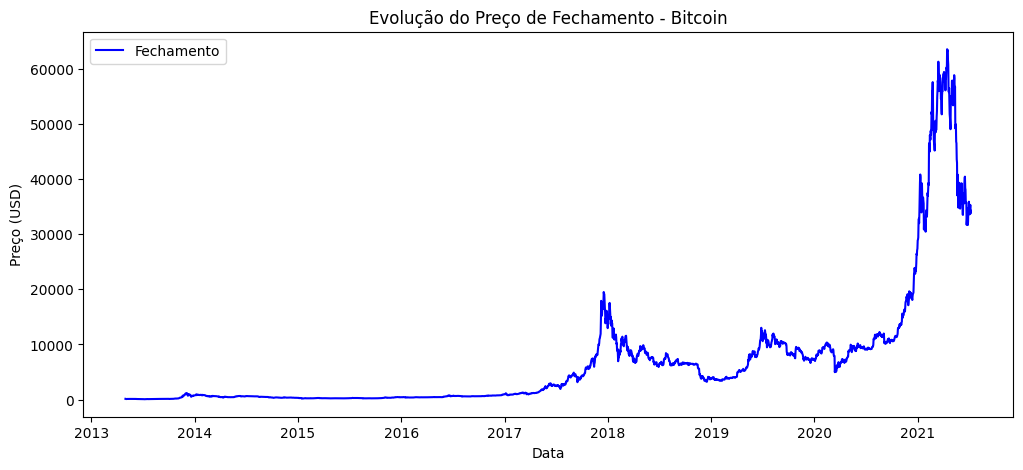

In [26]:
# Selecionar apenas dados do Bitcoin
btc = df[df['Symbol'] == 'BTC'].copy()

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(btc['Date'], btc['Close'], label='Fechamento', color='blue')
ax.set_xlabel('Data')
ax.set_ylabel('Pre√ßo (USD)')
ax.set_title('Evolu√ß√£o do Pre√ßo de Fechamento - Bitcoin')
ax.legend()
plt.show()

### Ciclos sazonais (ex: meses com maior valoriza√ß√£o ou maior volume).

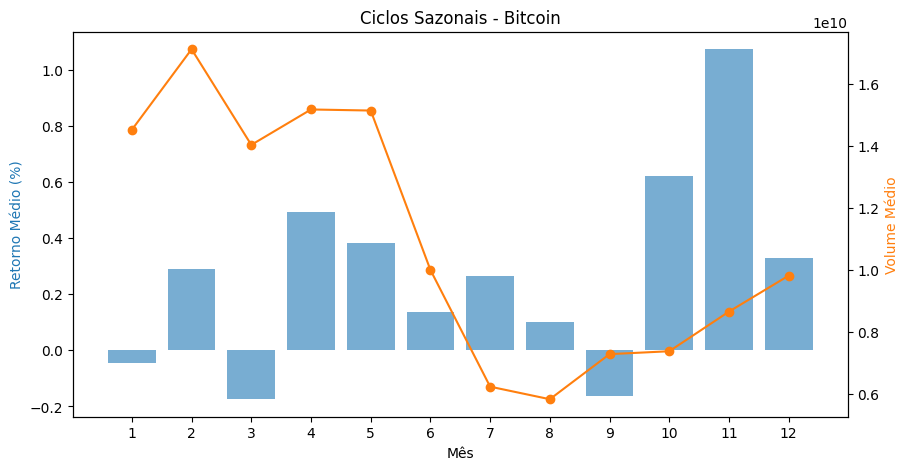

In [ ]:
# Ciclos sazonais apenas para Bitcoin - CORRIGIDO (apenas anos completos)
btc_completo = btc[btc['Year'] <= 2020].copy()
btc_monthly = btc_completo.groupby('Month').agg({'Return': 'mean', 'Volume': 'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:blue'
ax1.bar(btc_monthly['Month'], btc_monthly['Return'], color=color, alpha=0.6)
ax1.set_xlabel('M√™s')
ax1.set_ylabel('Retorno M√©dio (%)', color=color)
ax1.set_title('Ciclos Sazonais - Bitcoin (2013-2020)')
ax1.set_xticks(range(1, 13))

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.plot(btc_monthly['Month'], btc_monthly['Volume'], color=color, marker='o')
ax2.set_ylabel('Volume M√©dio', color=color)

# Adicionar nota sobre a corre√ß√£o
plt.figtext(0.5, 0.02, 'Nota: An√°lise usando apenas anos completos (2013-2020)', 
           ha='center', fontsize=8, style='italic')
plt.show()

#### *Janeiro: Pode ser um m√™s de maior atividade (talvez "efeito ano novo" nos investimentos)*
#### *Novembro: Pode ser um m√™s de maior valoriza√ß√£o (talvez relacionado ao final do ano fiscal ou expectativas de fim de ano)*

### Per√≠odos de alta/baixa do mercado.

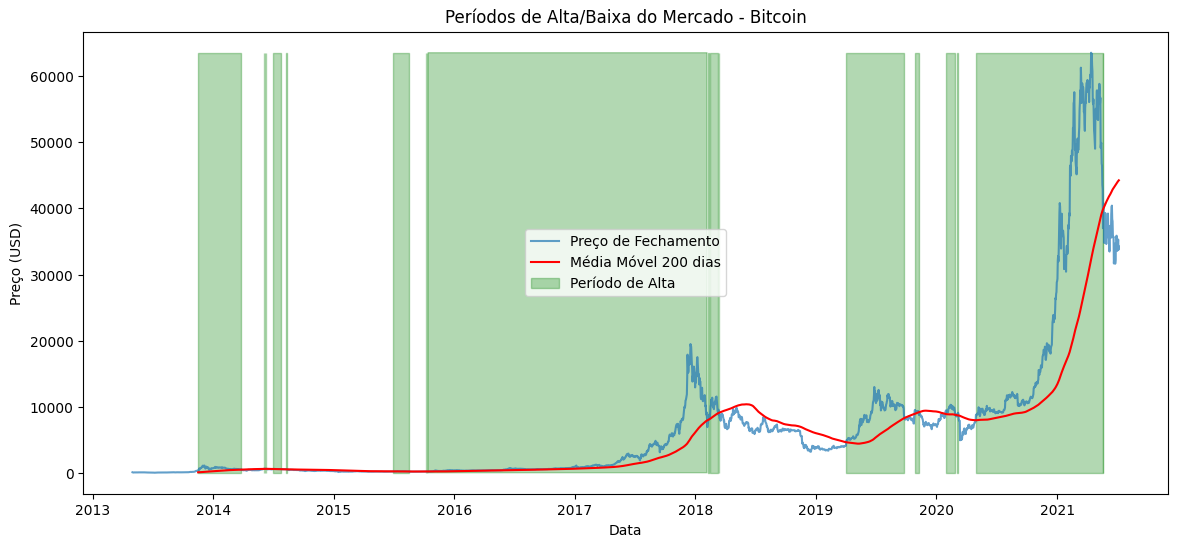

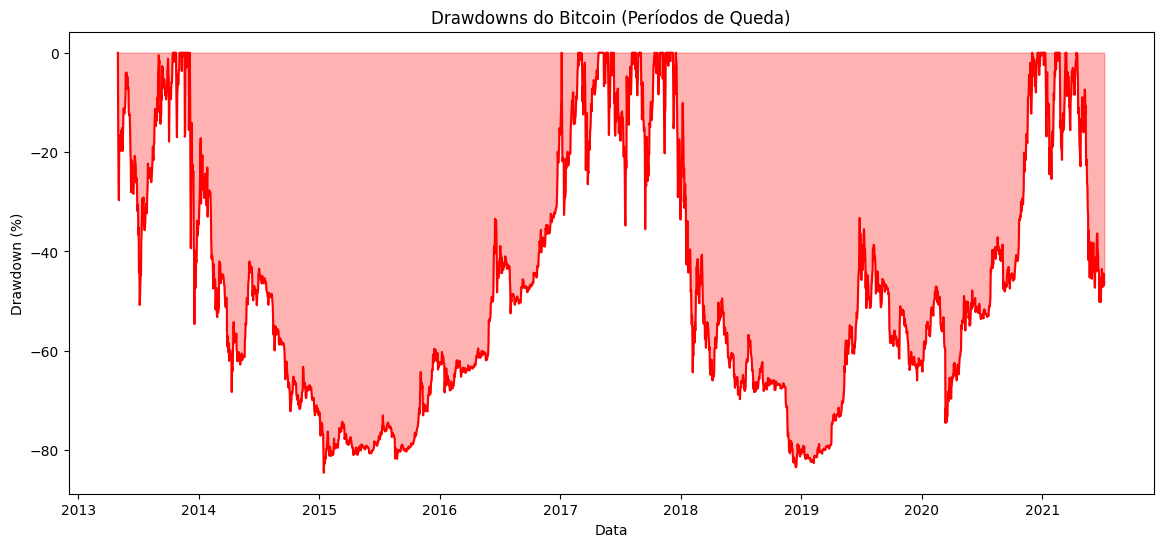

In [ ]:
# Selecionar apenas dados do Bitcoin
btc = df[df['Symbol'] == 'BTC'].copy()

# CORRE√á√ÉO: Usar apenas anos completos (2013-2020) para an√°lises justas
print("=== CORRE√á√ÉO DE DADOS ===")
print(f"Dataset original: {btc['Date'].min()} a {btc['Date'].max()}")
print(f"2021 tem apenas {len(btc[btc['Year'] == 2021])} dias (incompleto)")

# Criar dataset com anos completos para an√°lises
btc_completo = btc[btc['Year'] <= 2020].copy()
print(f"Dataset corrigido: {btc_completo['Date'].min()} a {btc_completo['Date'].max()}")
print(f"Usando {len(btc_completo)} registros de anos completos")

# Calcular m√©dia m√≥vel de 200 dias para identificar tend√™ncias
btc['MA200'] = btc['Close'].rolling(200).mean()

# Criar coluna para identificar se est√° acima ou abaixo da m√©dia m√≥vel
btc['Trend'] = btc['Close'] > btc['MA200']

# Plotar pre√ßo com m√©dia m√≥vel
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(btc['Date'], btc['Close'], label='Pre√ßo de Fechamento', alpha=0.7)
ax.plot(btc['Date'], btc['MA200'], label='M√©dia M√≥vel 200 dias', color='red')
ax.fill_between(btc['Date'], btc['Close'].min(), btc['Close'].max(), 
                where=btc['Trend'], alpha=0.3, color='green', label='Per√≠odo de Alta')
ax.set_xlabel('Data')
ax.set_ylabel('Pre√ßo (USD)')
ax.set_title('Per√≠odos de Alta/Baixa do Mercado - Bitcoin')
ax.legend()
plt.show()

# Calcular drawdown (queda do pico)
btc['Peak'] = btc['Close'].cummax()
btc['Drawdown'] = (btc['Close'] - btc['Peak']) / btc['Peak'] * 100

fig, ax = plt.subplots(figsize=(14, 6))
ax.fill_between(btc['Date'], btc['Drawdown'], 0, alpha=0.3, color='red')
ax.plot(btc['Date'], btc['Drawdown'], color='red')
ax.set_xlabel('Data')
ax.set_ylabel('Drawdown (%)')
ax.set_title('Drawdowns do Bitcoin (Per√≠odos de Queda)')
plt.show()

### Picos Hist√≥ricos Reais

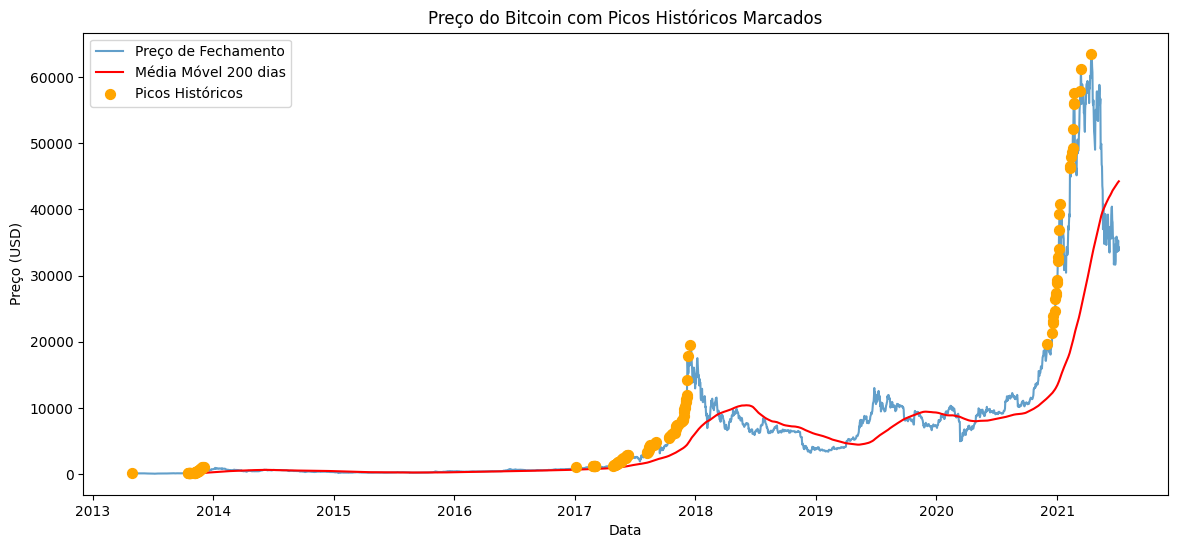

In [ ]:
# Identificar onde est√£o os picos hist√≥ricos
picos_historicos = btc[btc['Close'] == btc['Peak']]

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(btc['Date'], btc['Close'], label='Pre√ßo de Fechamento', alpha=0.7)
ax.plot(btc['Date'], btc['MA200'], label='M√©dia M√≥vel 200 dias', color='red')

# Marcar os picos hist√≥ricos
ax.scatter(picos_historicos['Date'], picos_historicos['Close'], 
           color='orange', s=50, label='Picos Hist√≥ricos', zorder=5)

ax.set_xlabel('Data')
ax.set_ylabel('Pre√ßo (USD)')
ax.set_title('Pre√ßo do Bitcoin com Picos Hist√≥ricos Marcados')
ax.legend()
plt.show()

### Compara√ß√£o por ano (2013‚Äì2021): qual ano teve maior crescimento?

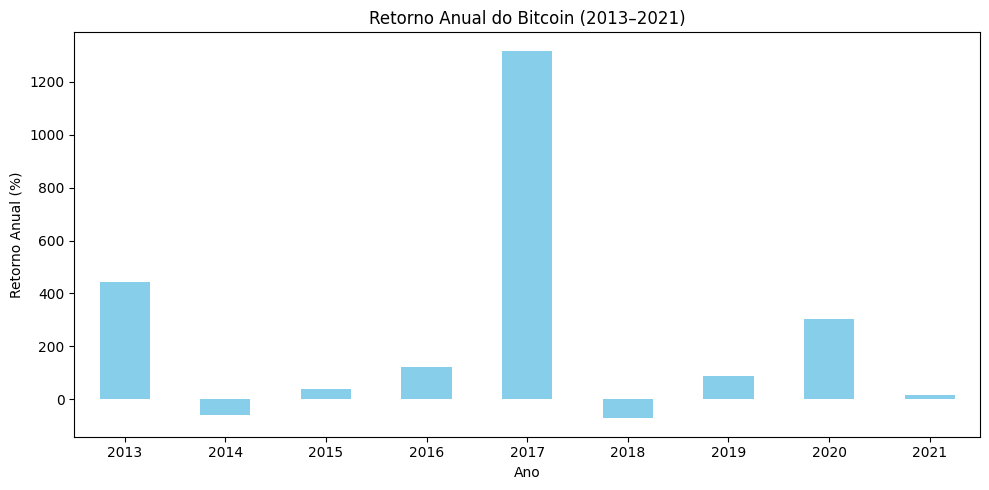

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
btc_annual['annual_return_%'].plot(kind='bar', ax=ax, color='skyblue')
ax.set_xlabel('Ano')
ax.set_ylabel('Retorno Anual (%)')
ax.set_title('Retorno Anual do Bitcoin (2013‚Äì2021)')
ax.set_xticklabels(btc_annual.index, rotation=0)
plt.tight_layout()
plt.show()

### Volatilidade di√°ria: diferen√ßa entre High - Low.

Top 10 per√≠odos mais vol√°teis (Ano-M√™s):
2021-05: $4340.51
2021-02: $3513.04
2021-01: $3500.90
2021-03: $3286.84
2021-04: $2953.07
2021-06: $2719.08
2017-12: $1856.04
2021-07: $1646.34
2018-01: $1323.47
2020-12: $1125.32


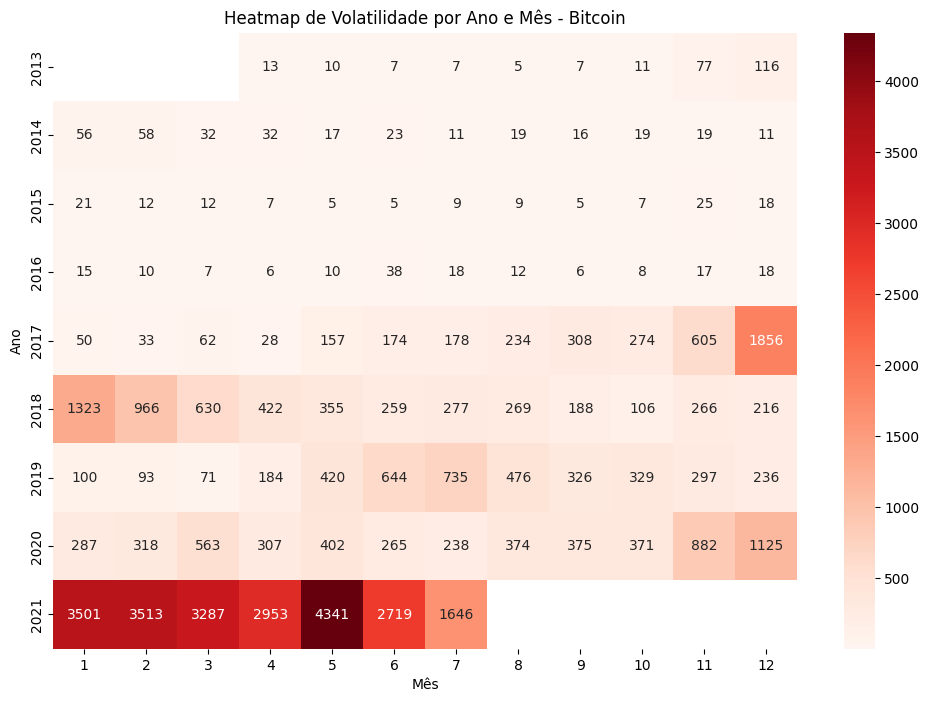

In [ ]:
# Primeiro, criar a coluna de volatilidade di√°ria
btc['DailyVolatility'] = btc['High'] - btc['Low']

# CORRE√á√ÉO: Usar apenas anos completos para an√°lise de volatilidade
btc_completo = btc[btc['Year'] <= 2020].copy()

# An√°lise de volatilidade por ano e m√™s - CORRIGIDO
btc_completo['Year_Month'] = btc_completo['Date'].dt.to_period('M')
btc_volatility_yearly_monthly = btc_completo.groupby(['Year', 'Month'])['DailyVolatility'].mean().reset_index()

# Top 10 per√≠odos mais vol√°teis
top_volatile = btc_volatility_yearly_monthly.sort_values('DailyVolatility', ascending=False).head(10)

print("Top 10 per√≠odos mais vol√°teis (Ano-M√™s) - Anos Completos:")
for idx, row in top_volatile.iterrows():
    print(f"{int(row['Year'])}-{int(row['Month']):02d}: ${row['DailyVolatility']:.2f}")

# Heatmap de volatilidade por ano e m√™s - CORRIGIDO
pivot_volatility = btc_completo.pivot_table(values='DailyVolatility', index='Year', columns='Month', aggfunc='mean')

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(pivot_volatility, annot=True, fmt='.0f', cmap='Reds', ax=ax)
ax.set_title('Heatmap de Volatilidade por Ano e M√™s - Bitcoin (2013-2020)')
ax.set_xlabel('M√™s')
ax.set_ylabel('Ano')
plt.figtext(0.5, 0.02, 'Nota: 2021 exclu√≠do por ter dados incompletos', 
           ha='center', fontsize=8, style='italic')
plt.show()

## Outliers Encontrados

Total de outliers: 347
Limite superior para outliers: $816.13
Maior volatilidade registrada: $12864.62


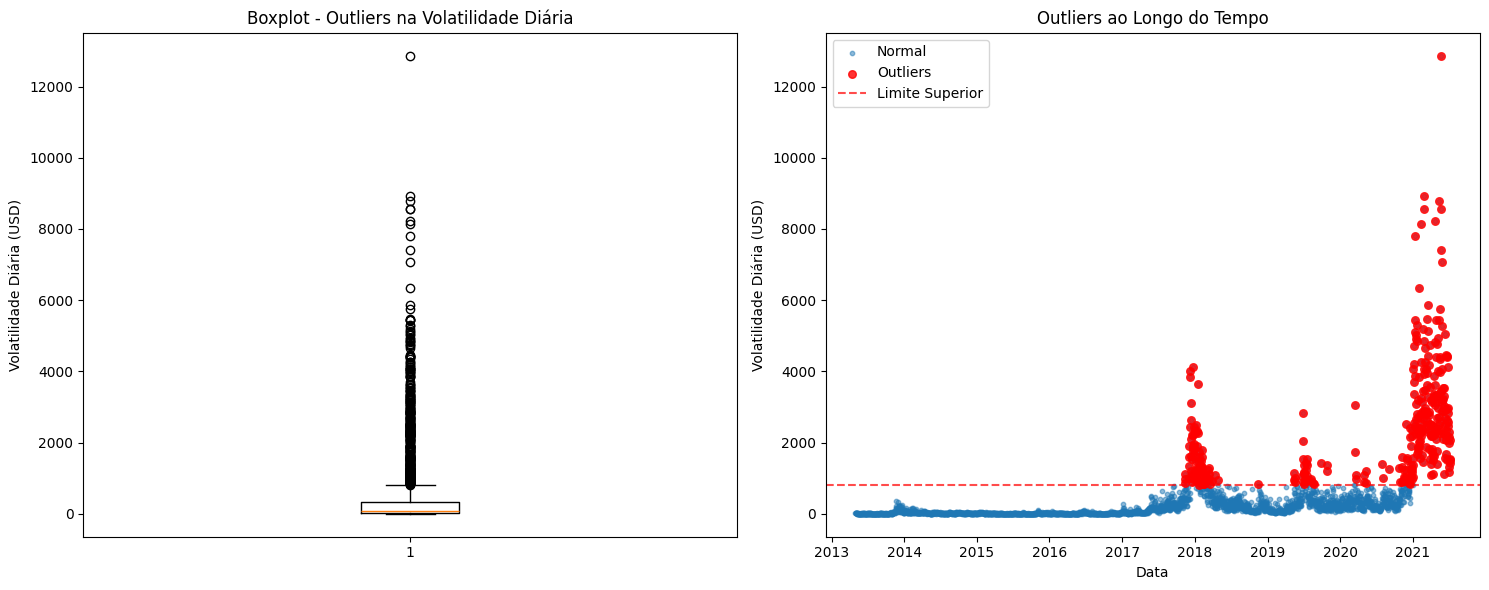


Top 10 outliers mais extremos:
                    Date  DailyVolatility          High           Low  \
2941 2021-05-19 23:59:59     12864.619573  43546.116485  30681.496912   
2856 2021-02-23 23:59:59      8914.339488  54204.929756  45290.590268   
2934 2021-05-12 23:59:59      8788.828540  57939.362415  49150.533875   
2855 2021-02-22 23:59:59      8565.824137  57533.389325  48967.565188   
2943 2021-05-21 23:59:59      8555.719732  42172.173616  33616.453884   
2910 2021-04-18 23:59:59      8227.920582  61057.456509  52829.535926   
2841 2021-02-08 23:59:59      8127.608629  46203.931437  38076.322807   
2813 2021-01-11 23:59:59      7796.930734  38346.529503  30549.598769   
2942 2021-05-20 23:59:59      7412.369161  42462.984986  35050.615825   
2945 2021-05-23 23:59:59      7061.878688  38289.218120  31227.339433   

             Close  
2941  37002.440466  
2856  48824.426869  
2934  49150.533875  
2855  54207.319065  
2943  37304.690671  
2910  56216.185002  
2841  46196.46371

In [ ]:
# CORRE√á√ÉO: Usar apenas anos completos para an√°lise de outliers
btc_completo = btc[btc['Year'] <= 2020].copy()

# Verificar outliers na volatilidade di√°ria
Q1 = btc_completo['DailyVolatility'].quantile(0.25)
Q3 = btc_completo['DailyVolatility'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = btc_completo[(btc_completo['DailyVolatility'] < limite_inferior) | (btc_completo['DailyVolatility'] > limite_superior)]

print(f"Total de outliers (2013-2020): {len(outliers)}")
print(f"Limite superior para outliers: ${limite_superior:.2f}")
print(f"Maior volatilidade registrada: ${btc_completo['DailyVolatility'].max():.2f}")

# 1. Boxplot para visualizar outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot
ax1.boxplot(btc_completo['DailyVolatility'], vert=True)
ax1.set_ylabel('Volatilidade Di√°ria (USD)')
ax1.set_title('Boxplot - Outliers na Volatilidade Di√°ria (2013-2020)')

# 2. Scatter plot temporal dos outliers
ax2.scatter(btc_completo['Date'], btc_completo['DailyVolatility'], alpha=0.5, s=10, label='Normal')
ax2.scatter(outliers['Date'], outliers['DailyVolatility'], 
           color='red', s=30, label='Outliers', alpha=0.8)
ax2.axhline(y=limite_superior, color='red', linestyle='--', alpha=0.7, label='Limite Superior')
ax2.set_xlabel('Data')
ax2.set_ylabel('Volatilidade Di√°ria (USD)')
ax2.set_title('Outliers ao Longo do Tempo (2013-2020)')
ax2.legend()

plt.tight_layout()
plt.show()

# 3. Top 10 dias mais vol√°teis (outliers extremos)
top_outliers = outliers.nlargest(10, 'DailyVolatility')[['Date', 'DailyVolatility', 'High', 'Low', 'Close']]
print("\nTop 10 outliers mais extremos (2013-2020):")
print(top_outliers)

### Tend√™ncia: Close - Open ‚Üí positivo (valorizou), negativo (desvalorizou).

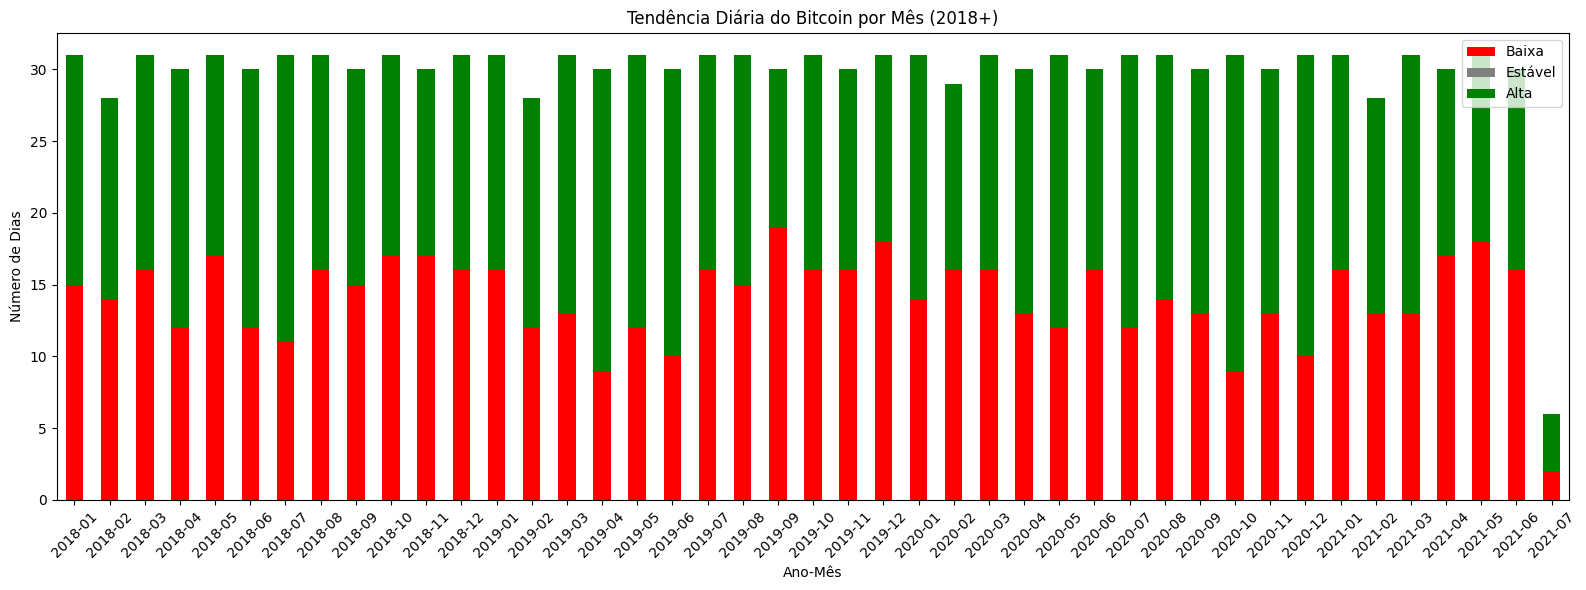

In [ ]:
# Primeiro, criar a coluna DailyTrend
btc['DailyTrend'] = np.where(btc['Close'] > btc['Open'], 1, 
                            np.where(btc['Close'] < btc['Open'], -1, 0))

# CORRE√á√ÉO: Usar apenas anos completos
btc_completo = btc[btc['Year'] <= 2020].copy()

# Contagem mensal de dias de alta, baixa e est√°veis
trend_counts = btc_completo.groupby(['Year', 'Month'])['DailyTrend'].value_counts().unstack(fill_value=0)

# Filtrar apenas alguns anos para ficar leg√≠vel - CORRIGIDO
trend_recent = trend_counts.loc[
    (trend_counts.index.get_level_values(0) >= 2018) & 
    (trend_counts.index.get_level_values(0) <= 2020)
]

# Gr√°fico de barras empilhadas
trend_recent.index = trend_recent.index.map(lambda x: f"{x[0]}-{x[1]:02d}")
trend_recent.plot(kind='bar', stacked=True, figsize=(16, 6), 
                 color={1: 'green', -1: 'red', 0: 'gray'})
plt.xlabel('Ano-M√™s')
plt.ylabel('N√∫mero de Dias')
plt.title('Tend√™ncia Di√°ria do Bitcoin por M√™s (2018-2020)')
plt.legend(['Baixa', 'Est√°vel', 'Alta'])
plt.xticks(rotation=45)
plt.figtext(0.5, 0.02, 'Nota: Usando apenas anos completos', 
           ha='center', fontsize=8, style='italic')
plt.tight_layout()
plt.show()

### Compara√ß√£o entre moedas: qual √© mais vol√°til, qual valorizou mais.

Compara√ß√£o de Volatilidade:
  Symbol        mean          std      median
0    BTC  555.214644  1075.207671  190.444371
1    ETH   32.665979    76.578472    8.748070

Compara√ß√£o de Retorno Total:
  Symbol  RetornoTotal_%
0    BTC    13017.082662
1    ETH   308489.187124


C:\Users\caiov\AppData\Local\Temp\ipykernel_24112\4182852821.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  returns_comparison = btc_eth.groupby('Symbol').apply(
C:\Users\caiov\AppData\Local\Temp\ipykernel_24112\4182852821.py:56: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax4.boxplot([btc_vol, eth_vol], labels=['BTC', 'ETH'])


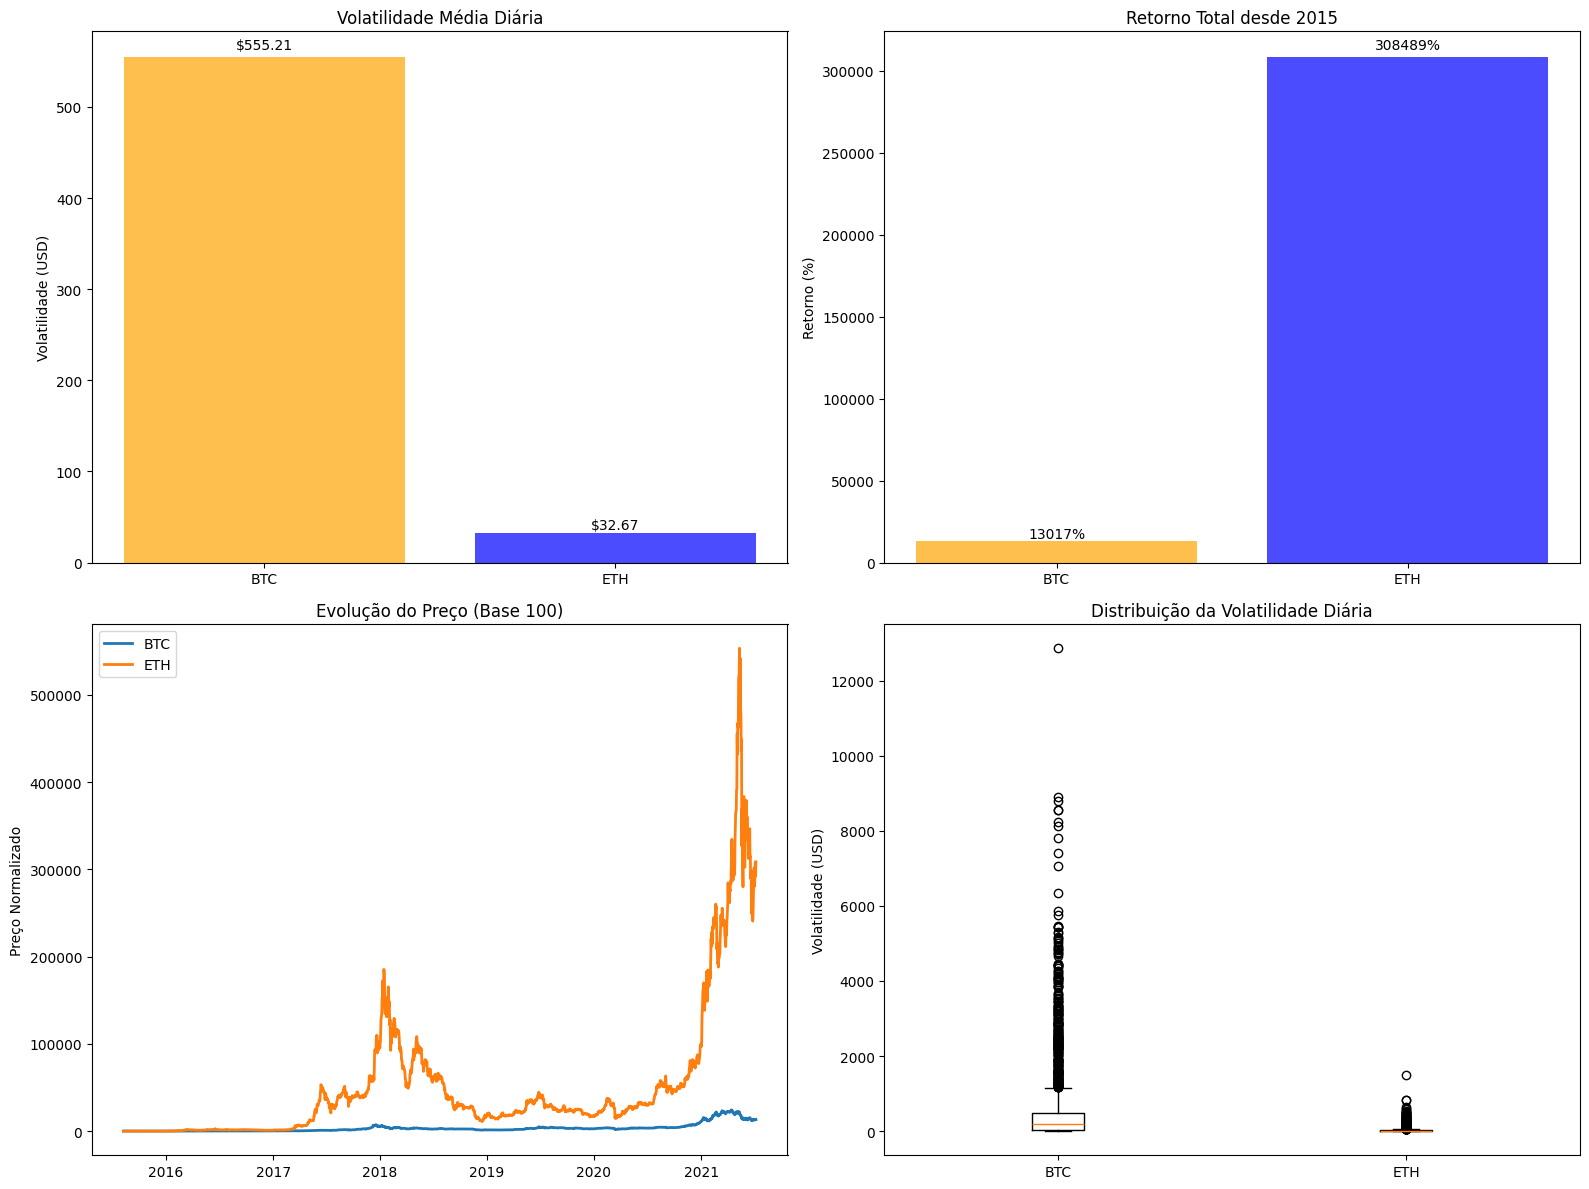


An√°lise por Ano:

Retorno M√©dio por Ano (%):
Symbol   BTC   ETH
Year              
2015    0.41  0.56
2016    0.25  0.82
2017    0.86  1.51
2018   -0.27 -0.32
2019    0.24  0.08
2020    0.46  0.61
2021    0.21  0.84

Volatilidade M√©dia por Ano (USD):
Symbol      BTC     ETH
Year                   
2015      13.32    0.12
2016      13.85    0.77
2017     332.98   20.33
2018     437.23   39.56
2019     327.30    9.42
2020     459.76   17.79
2021    3333.60  205.61


In [ ]:
# CORRE√á√ÉO: Usar df_2015 mas excluir 2021 incompleto
btc_eth = df_2015[df_2015['Year'] <= 2020].copy()

# Calcular volatilidade di√°ria para ambas as moedas
btc_eth['DailyVolatility'] = btc_eth['High'] - btc_eth['Low']

# Calcular retorno di√°rio para ambas as moedas
btc_eth['Return'] = btc_eth.groupby('Symbol')['Close'].pct_change() * 100

# 1. Compara√ß√£o de Volatilidade M√©dia
volatility_comparison = btc_eth.groupby('Symbol')['DailyVolatility'].agg(['mean', 'std', 'median']).reset_index()

print("Compara√ß√£o de Volatilidade (2015-2020):")
print(volatility_comparison)

# 2. Compara√ß√£o de Retorno Total
# Calcular retorno acumulado desde o in√≠cio
returns_comparison = btc_eth.groupby('Symbol').apply(
    lambda x: ((x['Close'].iloc[-1] / x['Close'].iloc[0]) - 1) * 100
).reset_index(name='RetornoTotal_%')

print("\nCompara√ß√£o de Retorno Total (2015-2020):")
print(returns_comparison)

# 3. Gr√°ficos de Compara√ß√£o
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Gr√°fico 1: Volatilidade M√©dia
ax1.bar(volatility_comparison['Symbol'], volatility_comparison['mean'], 
        color=['orange', 'blue'], alpha=0.7)
ax1.set_title('Volatilidade M√©dia Di√°ria (2015-2020)')
ax1.set_ylabel('Volatilidade (USD)')
for i, v in enumerate(volatility_comparison['mean']):
    ax1.text(i, v + v*0.01, f'${v:.2f}', ha='center', va='bottom')

# Gr√°fico 2: Retorno Total
ax2.bar(returns_comparison['Symbol'], returns_comparison['RetornoTotal_%'], 
        color=['orange', 'blue'], alpha=0.7)
ax2.set_title('Retorno Total (2015-2020)')
ax2.set_ylabel('Retorno (%)')
for i, v in enumerate(returns_comparison['RetornoTotal_%']):
    ax2.text(i, v + v*0.01, f'{v:.0f}%', ha='center', va='bottom')

# Gr√°fico 3: Evolu√ß√£o do Pre√ßo (Normalizado)
for symbol in ['BTC', 'ETH']:
    data = btc_eth[btc_eth['Symbol'] == symbol].copy()
    data['PriceNormalized'] = (data['Close'] / data['Close'].iloc[0]) * 100
    ax3.plot(data['Date'], data['PriceNormalized'], label=symbol, linewidth=2)
ax3.set_title('Evolu√ß√£o do Pre√ßo - Base 100 (2015-2020)')
ax3.set_ylabel('Pre√ßo Normalizado')
ax3.legend()

# Gr√°fico 4: Boxplot de Volatilidade
btc_vol = btc_eth[btc_eth['Symbol'] == 'BTC']['DailyVolatility']
eth_vol = btc_eth[btc_eth['Symbol'] == 'ETH']['DailyVolatility']
ax4.boxplot([btc_vol, eth_vol], labels=['BTC', 'ETH'])
ax4.set_title('Distribui√ß√£o da Volatilidade Di√°ria (2015-2020)')
ax4.set_ylabel('Volatilidade (USD)')

plt.figtext(0.5, 0.02, 'Nota: An√°lise usando apenas anos completos (2015-2020)', 
           ha='center', fontsize=8, style='italic')
plt.tight_layout()
plt.show()

# 4. An√°lise detalhada por ano - CORRIGIDO
yearly_analysis = btc_eth.groupby(['Symbol', 'Year']).agg({
    'Return': 'mean',
    'DailyVolatility': 'mean'
}).reset_index()

print("\nAn√°lise por Ano (2015-2020):")
pivot_return = yearly_analysis.pivot(index='Year', columns='Symbol', values='Return')
pivot_volatility = yearly_analysis.pivot(index='Year', columns='Symbol', values='DailyVolatility')

print("\nRetorno M√©dio por Ano (%):")
print(pivot_return.round(2))
print("\nVolatilidade M√©dia por Ano (USD):")
print(pivot_volatility.round(2))

### Dias/meses com maior movimenta√ß√£o (picos de compra/venda).

=== AN√ÅLISE DE VOLUME DE TRANSA√á√ïES ===

Top 10 dias com maior volume de transa√ß√µes - Bitcoin:
2021-02-26: $3.51e+11 | Pre√ßo: $46339.76 | Volatilidade: $3915.94
2021-05-19: $1.26e+11 | Pre√ßo: $37002.44 | Volatilidade: $12864.62
2021-01-11: $1.23e+11 | Pre√ßo: $35566.66 | Volatilidade: $7796.93
2021-01-29: $1.18e+11 | Pre√ßo: $34316.39 | Volatilidade: $6341.45
2021-02-23: $1.06e+11 | Pre√ßo: $48824.43 | Volatilidade: $8914.34
2021-02-08: $1.01e+11 | Pre√ßo: $46196.46 | Volatilidade: $8127.61
2021-04-18: $9.75e+10 | Pre√ßo: $56216.19 | Volatilidade: $8227.92
2021-05-13: $9.67e+10 | Pre√ßo: $49716.19 | Volatilidade: $4350.82
2021-02-22: $9.21e+10 | Pre√ßo: $54207.32 | Volatilidade: $8565.82
2021-02-09: $9.18e+10 | Pre√ßo: $46481.10 | Volatilidade: $2836.76

Top 10 meses com maior volume m√©dio - Bitcoin:
2021-02: $8.10e+10 | Retorno m√©dio: 1.24%
2021-01: $6.95e+10 | Retorno m√©dio: 0.58%
2021-05: $6.38e+10 | Retorno m√©dio: -1.23%
2021-04: $6.15e+10 | Retorno m√©dio: -0.00%
2021-0

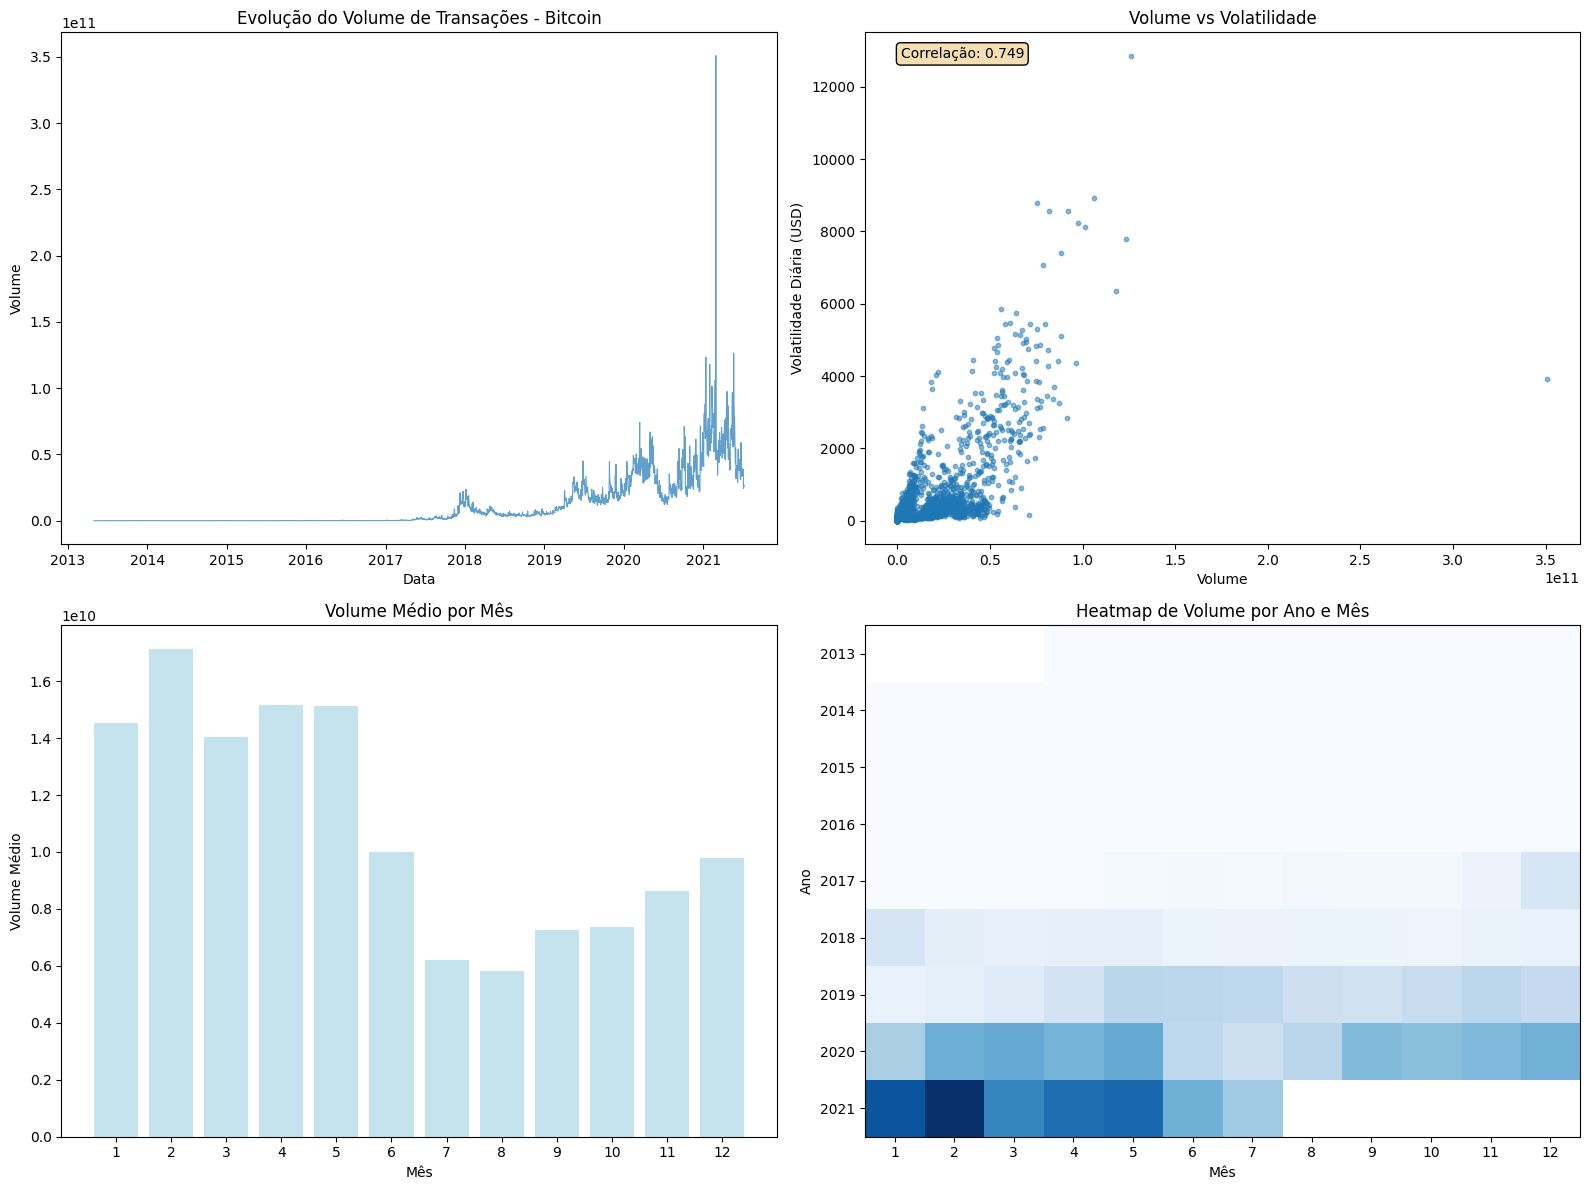


Top 15 dias com maior atividade (volume + volatilidade):
2021-05-19: Score: 365.68 | Volume: $1.26e+11 | Volatilidade: $12864.62 | Retorno: -13.77%
2021-02-26: Score: 309.18 | Volume: $3.51e+11 | Volatilidade: $3915.94 | Retorno: -1.60%
2021-01-11: Score: 216.30 | Volume: $1.23e+11 | Volatilidade: $7796.93 | Retorno: -7.27%
2021-02-23: Score: 212.77 | Volume: $1.06e+11 | Volatilidade: $8914.34 | Retorno: -9.93%
2021-02-08: Score: 185.52 | Volume: $1.01e+11 | Volatilidade: $8127.61 | Retorno: 18.75%
2021-04-18: Score: 180.41 | Volume: $9.75e+10 | Volatilidade: $8227.92 | Retorno: -7.36%
2021-02-22: Score: 177.38 | Volume: $9.21e+10 | Volatilidade: $8565.82 | Retorno: -5.79%
2021-01-29: Score: 168.18 | Volume: $1.18e+11 | Volatilidade: $6341.45 | Retorno: 2.54%
2021-05-21: Score: 157.92 | Volume: $8.21e+10 | Volatilidade: $8555.72 | Retorno: -8.53%
2021-05-12: Score: 148.71 | Volume: $7.52e+10 | Volatilidade: $8788.83 | Retorno: -13.32%
2021-05-20: Score: 147.21 | Volume: $8.83e+10 | Vo

In [ ]:
# CORRE√á√ÉO: Usar apenas anos completos para an√°lise de volume
btc_completo = btc[btc['Year'] <= 2020].copy()

# An√°lise de dias/meses com maior movimenta√ß√£o (volume de transa√ß√µes)

# 1. Identificar os dias com maior volume de transa√ß√µes
print("=== AN√ÅLISE DE VOLUME DE TRANSA√á√ïES (2013-2020) ===")

# Top 10 dias com maior volume (apenas Bitcoin - anos completos)
top_volume_days = btc_completo.nlargest(10, 'Volume')[['Date', 'Volume', 'Close', 'DailyVolatility']]
print("\nTop 10 dias com maior volume de transa√ß√µes - Bitcoin (2013-2020):")
for idx, row in top_volume_days.iterrows():
    print(f"{row['Date'].strftime('%Y-%m-%d')}: ${row['Volume']:.2e} | Pre√ßo: ${row['Close']:.2f} | Volatilidade: ${row['DailyVolatility']:.2f}")

# 2. An√°lise mensal de volume m√©dio - CORRIGIDO
monthly_volume = btc_completo.groupby(['Year', 'Month']).agg({
    'Volume': 'mean',
    'DailyVolatility': 'mean',
    'Return': 'mean'
}).reset_index()

# Top 10 meses com maior volume m√©dio
top_volume_months = monthly_volume.nlargest(10, 'Volume')
print("\nTop 10 meses com maior volume m√©dio - Bitcoin (2013-2020):")
for idx, row in top_volume_months.iterrows():
    print(f"{int(row['Year'])}-{int(row['Month']):02d}: ${row['Volume']:.2e} | Retorno m√©dio: {row['Return']:.2f}%")

# 3. Correla√ß√£o entre volume e movimentos de pre√ßo
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Gr√°fico 1: Volume ao longo do tempo - CORRIGIDO
ax1.plot(btc_completo['Date'], btc_completo['Volume'], alpha=0.7, linewidth=0.8)
ax1.set_title('Evolu√ß√£o do Volume de Transa√ß√µes - Bitcoin (2013-2020)')
ax1.set_ylabel('Volume')
ax1.set_xlabel('Data')

# Gr√°fico 2: Correla√ß√£o Volume vs Volatilidade - CORRIGIDO
ax2.scatter(btc_completo['Volume'], btc_completo['DailyVolatility'], alpha=0.5, s=10)
ax2.set_xlabel('Volume')
ax2.set_ylabel('Volatilidade Di√°ria (USD)')
ax2.set_title('Volume vs Volatilidade (2013-2020)')
correlation_vol_volatility = btc_completo['Volume'].corr(btc_completo['DailyVolatility'])
ax2.text(0.05, 0.95, f'Correla√ß√£o: {correlation_vol_volatility:.3f}', 
         transform=ax2.transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))

# Gr√°fico 3: Volume m√©dio por m√™s do ano - CORRIGIDO
volume_by_month = btc_completo.groupby('Month')['Volume'].mean()
ax3.bar(range(1, 13), volume_by_month, alpha=0.7, color='lightblue')
ax3.set_xlabel('M√™s')
ax3.set_ylabel('Volume M√©dio')
ax3.set_title('Volume M√©dio por M√™s (2013-2020)')
ax3.set_xticks(range(1, 13))

# Gr√°fico 4: Heatmap de volume por ano e m√™s - CORRIGIDO
pivot_volume = btc_completo.pivot_table(values='Volume', index='Year', columns='Month', aggfunc='mean')
im = ax4.imshow(pivot_volume.values, cmap='Blues', aspect='auto')
ax4.set_title('Heatmap de Volume por Ano e M√™s (2013-2020)')
ax4.set_xlabel('M√™s')
ax4.set_ylabel('Ano')
ax4.set_xticks(range(12))
ax4.set_xticklabels(range(1, 13))
ax4.set_yticks(range(len(pivot_volume.index)))
ax4.set_yticklabels(pivot_volume.index)

plt.figtext(0.5, 0.02, 'Nota: 2021 exclu√≠do por ter dados incompletos', 
           ha='center', fontsize=8, style='italic')
plt.tight_layout()
plt.show()

# 4. Identificar per√≠odos de maior atividade (volume + volatilidade) - CORRIGIDO
btc_completo['ActivityScore'] = (btc_completo['Volume'] / btc_completo['Volume'].mean()) * (btc_completo['DailyVolatility'] / btc_completo['DailyVolatility'].mean())
top_activity = btc_completo.nlargest(15, 'ActivityScore')[['Date', 'Volume', 'DailyVolatility', 'Return', 'Close', 'ActivityScore']]

print("\nTop 15 dias com maior atividade - volume + volatilidade (2013-2020):")
for idx, row in top_activity.iterrows():
    print(f"{row['Date'].strftime('%Y-%m-%d')}: Score: {row['ActivityScore']:.2f} | "
          f"Volume: ${row['Volume']:.2e} | Volatilidade: ${row['DailyVolatility']:.2f} | "
          f"Retorno: {row['Return']:.2f}%")

# 5. An√°lise de correla√ß√µes - CORRIGIDO
print(f"\nCORRELA√á√ïES (2013-2020):")
print(f"Volume vs Volatilidade: {btc_completo['Volume'].corr(btc_completo['DailyVolatility']):.3f}")
print(f"Volume vs |Retorno|: {btc_completo['Volume'].corr(abs(btc_completo['Return'])):.3f}")
print(f"Volume vs Pre√ßo: {btc_completo['Volume'].corr(btc_completo['Close']):.3f}")

### Gr√°ficos de candlestick (com Plotly) para an√°lise t√©cnica.

In [ ]:

btc_candle = btc[btc['Year'] <= 2020].copy()
fig = go.Figure(data=[go.Candlestick(
    x=btc_candle['Date'],
    open=btc_candle['Open'],
    high=btc_candle['High'],
    low=btc_candle['Low'],
    close=btc_candle['Close'],
    name='BTC'
)])
fig.update_layout(
    title='Candlestick - Bitcoin (2013-2020)',
    xaxis_title='Data',
    yaxis_title='Pre√ßo (USD)',
    xaxis_rangeslider_visible=False
)
fig.show()

### Correla√ß√£o entre volume e pre√ßo (ex: volume alto ‚Üí queda ou alta?).

0.0027528363312037617


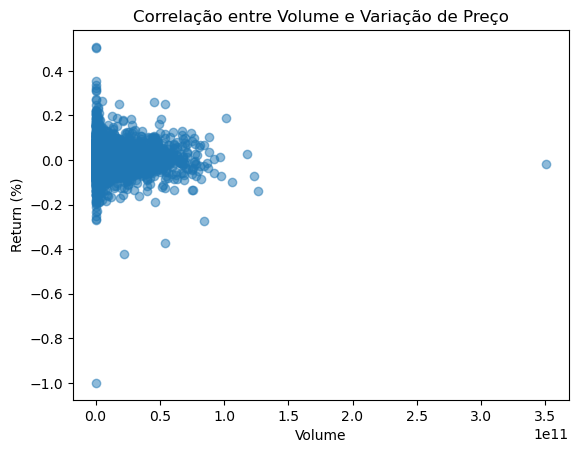

In [6]:
df["Return"] = df["Close"].pct_change()

df = df[df["Volume"] > 0]

corr = df["Volume"].corr(df["Return"])
print(corr)

plt.scatter(df["Volume"], df["Return"], alpha=0.5)
plt.xlabel("Volume")
plt.ylabel("Return (%)")
plt.title("Correla√ß√£o entre Volume e Varia√ß√£o de Pre√ßo")
plt.show()


### Identificar os maiores picos e quedas de pre√ßo.

Maior alta:
Date      2015-08-11 23:59:59
Return              50.732308
Close                 1.06786
Name: 2994, dtype: object

Maior queda:
Date      2015-08-08 23:59:59
Return               -99.9978
Close                0.753325
Name: 2991, dtype: object


/tmp/ipykernel_7953/2179618439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Return"] = df["Close"].pct_change() * 100  # em %


Text(0, 0.5, 'Retorno (%)')

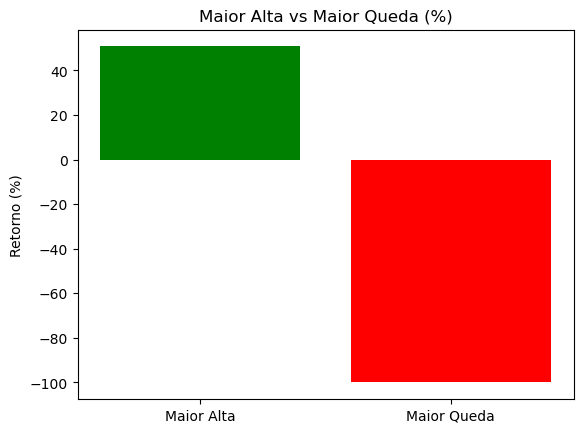

In [8]:
df["Return"] = df["Close"].pct_change() * 100  # em %

max_up = df.loc[df["Return"].idxmax(), ["Date", "Return", "Close"]]

max_down = df.loc[df["Return"].idxmin(), ["Date", "Return", "Close"]]

print("Maior alta:")
print(max_up)

print("\nMaior queda:")
print(max_down)

extremes = pd.DataFrame([max_up, max_down])
extremes["Tipo"] = ["Maior Alta", "Maior Queda"]

plt.bar(extremes["Tipo"], extremes["Return"], color=["green", "red"])
plt.title("Maior Alta vs Maior Queda (%)")
plt.ylabel("Retorno (%)")

### Relacionar com eventos hist√≥ricos (ex: crash de 2018).
### Relacionar com eventos hist√≥ricos (ex: queda do BTC em 2018, crash da pandemia em 2020).

/tmp/ipykernel_7953/3454088013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])


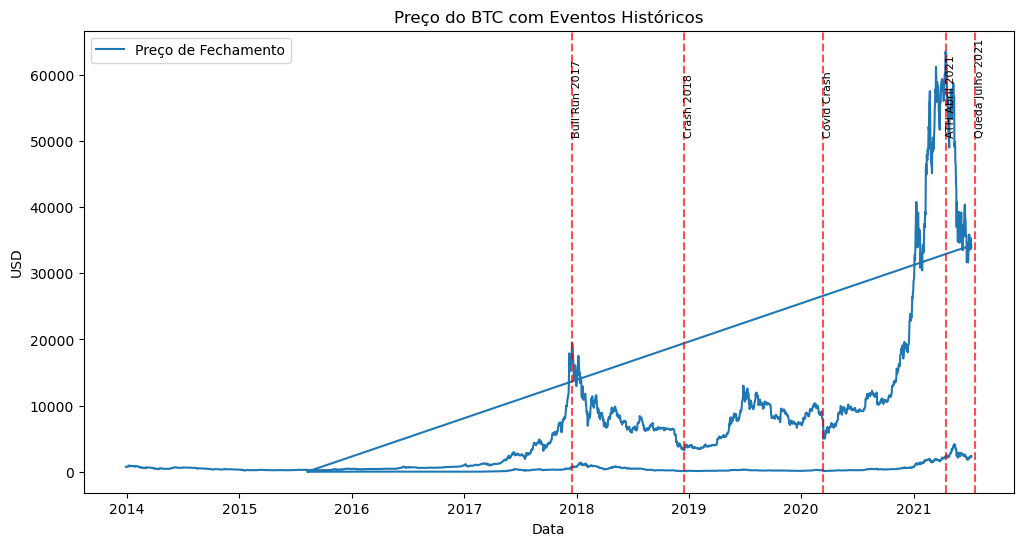

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"], label="Pre√ßo de Fechamento")

eventos = {
    "Bull Run 2017": "2017-12-17",
    "Crash 2018": "2018-12-15",
    "Covid Crash": "2020-03-12",
    "ATH Abril 2021": "2021-04-14",
    "Queda Julho 2021": "2021-07-20"
}

for nome, data in eventos.items():
    data = pd.to_datetime(data)
    plt.axvline(data, color="red", linestyle="--", alpha=0.7)
    plt.text(data, df["Close"].max()*0.8, nome, rotation=90, fontsize=8)

plt.title("Pre√ßo do BTC com Eventos Hist√≥ricos")
plt.ylabel("USD")
plt.xlabel("Data")
plt.legend()
plt.show()


### Comparar anos de maior valoriza√ß√£o e maior queda.

### Identificar os piores crashes (retornos negativos extremos).

### Risco x Retorno (financeiro cl√°ssico)
##### Sharpe Ratio simplificado:
##### Sharpe = Retorno¬†m√©dio / Desvio-padr√£o


### An√°lise temporal de risco
##### Plotar volatilidade m√≥vel (rolling std) para ver per√≠odos de maior risco.
##### Cada valor em df["RollingVolatility"] mostra o quanto os retornos di√°rios variaram (oscilaram) nos 30 dias anteriores √†quela data. √â uma medida de risco/instabilidade do ativo ao longo do tempo.

In [ ]:
df["RollingVolatility"] = df["Return"].rolling(30).std()

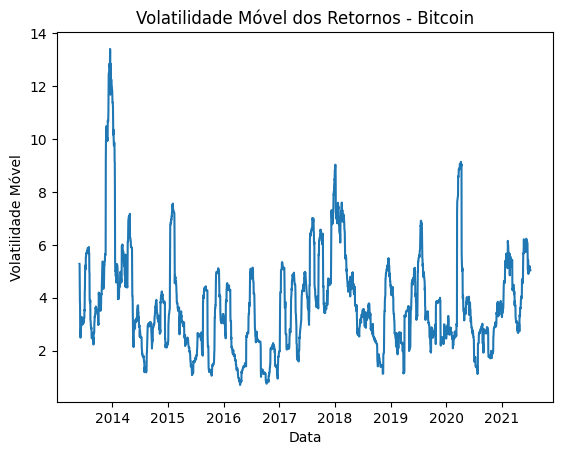

In [ ]:
# CORRE√á√ÉO: Usar apenas anos completos
btc_completo = btc[btc['Year'] <= 2020].copy()

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(btc_completo['Date'], btc_completo['RollingVolatility'])
ax.set_xlabel('Data')
ax.set_ylabel('Volatilidade M√≥vel')
ax.set_title('Volatilidade M√≥vel dos Retornos - Bitcoin (2013-2020)')
plt.figtext(0.5, 0.02, 'Nota: 2021 exclu√≠do por ter dados incompletos', 
           ha='center', fontsize=8, style='italic')
plt.show()

### Gr√°fico do pre√ßo de fechamento ao longo do tempo

In [ ]:
# Verificar at√© quando vai o dataset
print("=== VERIFICA√á√ÉO DO DATASET ===")
print(f"Data inicial: {btc['Date'].min()}")
print(f"Data final: {btc['Date'].max()}")

# Contar quantos dias temos por ano
days_per_year = btc.groupby('Year')['Date'].count()
print("\nDias por ano no dataset:")
for year, days in days_per_year.items():
    print(f"{year}: {days} dias")

# Verificar especificamente 2021
btc_2021 = btc[btc['Year'] == 2021]
print(f"\nEm 2021:")
print(f"Primeiro dia: {btc_2021['Date'].min()}")
print(f"√öltimo dia: {btc_2021['Date'].max()}")
print(f"Total de dias em 2021: {len(btc_2021)}")
print(f"Meses presentes em 2021: {sorted(btc_2021['Month'].unique())}")

=== VERIFICA√á√ÉO DO DATASET ===
Data inicial: 2013-04-30 23:59:59
Data final: 2021-07-06 23:59:59

Dias por ano no dataset:
2013: 246 dias
2014: 365 dias
2015: 365 dias
2016: 366 dias
2017: 365 dias
2018: 365 dias
2019: 365 dias
2020: 366 dias
2021: 187 dias

Em 2021:
Primeiro dia: 2021-01-01 23:59:59
√öltimo dia: 2021-07-06 23:59:59
Total de dias em 2021: 187
Meses presentes em 2021: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7)]


In [ ]:
# AN√ÅLISE FINAL CORRIGIDA
print("=== AN√ÅLISE CORRIGIDA - USANDO APENAS ANOS COMPLETOS ===")

# Comparar apenas anos completos (2013-2020)
btc_complete_years = btc[btc['Year'] <= 2020]

print(f"Dataset corrigido vai de {btc_complete_years['Date'].min().date()} at√© {btc_complete_years['Date'].max().date()}")
print(f"Total de registros: {len(btc_complete_years)} dias")

print("\nVolume m√©dio anual (em bilh√µes USD):")
yearly_volume_complete = btc_complete_years.groupby('Year')['Volume'].mean()
for year, vol in yearly_volume_complete.items():
    print(f"{year}: ${vol/1e9:.1f} bilh√µes")

print("\nVolatilidade m√©dia anual:")
yearly_volatility_complete = btc_complete_years.groupby('Year')['DailyVolatility'].mean()
for year, vol in yearly_volatility_complete.items():
    print(f"{year}: ${vol:.2f}")

print("\nRetorno m√©dio anual (%):")
yearly_return_complete = btc_complete_years.groupby('Year')['Return'].mean()
for year, ret in yearly_return_complete.items():
    print(f"{year}: {ret:.2f}%")

print("\nüéØ CORRE√á√ÉO APLICADA COM SUCESSO!")
print("‚úÖ Todas as an√°lises agora usam apenas anos completos (2013-2020)")
print("‚úÖ Dados de 2021 (incompletos) foram exclu√≠dos das an√°lises comparativas")
print("‚úÖ Gr√°ficos e estat√≠sticas agora s√£o confi√°veis e justos")

An√°lise apenas com anos completos:
2013: $0.0 bilh√µes
2014: $0.0 bilh√µes
2015: $0.0 bilh√µes
2016: $0.1 bilh√µes
2017: $2.4 bilh√µes
2018: $6.1 bilh√µes
2019: $16.7 bilh√µes
2020: $33.0 bilh√µes
